## 1. Carga de librerias

In [10]:
#Carga de librerias
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

Leer el archivo



In [11]:
VentasFinal = pd.read_csv(r"C:\Users\Juan Daniel Bermudez\Downloads\SalesFINAL12312016.csv",sep=',')


Para darnos una idea general de los datos, se imprimen las primeros 5 lineas.


In [12]:
VentasFinal.head()


,InventoryId,Store,Brand,Description,Size,SalesQuantity,SalesDollars,SalesPrice,SalesDate,Volume,Classification,ExciseTax,VendorNo,VendorName
0,1_HARDERSFIELD_1004,1,1004,Jim Beam w/2 Rocks Glasses,750mL,1,16.49,16.49,1/1/2016,750,1,0.79,12546,JIM BEAM BRANDS COMPANY
1,1_HARDERSFIELD_1004,1,1004,Jim Beam w/2 Rocks Glasses,750mL,2,32.98,16.49,1/2/2016,750,1,1.57,12546,JIM BEAM BRANDS COMPANY
2,1_HARDERSFIELD_1004,1,1004,Jim Beam w/2 Rocks Glasses,750mL,1,16.49,16.49,1/3/2016,750,1,0.79,12546,JIM BEAM BRANDS COMPANY
3,1_HARDERSFIELD_1004,1,1004,Jim Beam w/2 Rocks Glasses,750mL,1,14.49,14.49,1/8/2016,750,1,0.79,12546,JIM BEAM BRANDS COMPANY
4,1_HARDERSFIELD_1005,1,1005,Maker's Mark Combo Pack,375mL 2 Pk,2,69.98,34.99,1/9/2016,375,1,0.79,12546,JIM BEAM BRANDS COMPANY


In [13]:
#Corroboramos el tipo de dato de las columnas
print (VentasFinal.dtypes)

InventoryId        object
Store               int64
Brand               int64
Description        object
Size               object
SalesQuantity       int64
SalesDollars      float64
SalesPrice        float64
SalesDate          object
Volume              int64
Classification      int64
ExciseTax         float64
VendorNo            int64
VendorName         object
dtype: object


## 2. Análisis exploratorio de datos


In [14]:
# Se creó una función donde devuelve una tabla con la info necesaria para obtener información de los datos.
def dataframe_info(df):
    report = pd.DataFrame(columns=['Columna', 'TipoDato', 'Filas', 'Valores Unicos', 'Faltantes', 'Faltantes (%)'])
    for column in df.columns:
        data_type = df[column].dtype
        rows = df[column].shape[0] 
        unique_count = df[column].nunique()
        missing_values = df[column].isnull().sum()
        missing_percentage = (missing_values / len(df)) * 100
        report.loc[len(report)] = [column, data_type, rows, unique_count,  missing_values, missing_percentage.round(4)]
    return report

In [15]:
dataframe_info(VentasFinal)


,Columna,TipoDato,Filas,Valores Unicos,Faltantes,Faltantes (%)
0,InventoryId,object,1048575,170131,0,0.0
1,Store,int64,1048575,79,0,0.0
2,Brand,int64,1048575,7658,0,0.0
3,Description,object,1048575,6890,0,0.0
4,Size,object,1048575,40,0,0.0
5,SalesQuantity,int64,1048575,141,0,0.0
6,SalesDollars,float64,1048575,3426,0,0.0
7,SalesPrice,float64,1048575,273,0,0.0
8,SalesDate,object,1048575,60,0,0.0
9,Volume,int64,1048575,22,0,0.0


Verificamos si hay datos duplicados

In [16]:
# Comprobar si hay duplicados y mostrar el resultado
print("El dataset tiene duplicados." if VentasFinal.duplicated().any() else "El dataset no tiene duplicados.")

El dataset no tiene duplicados.


Realizamos un analisis decriptivo de cada columna.



In [17]:
#iteramos sobre cada columna de nuestro dataframe con un cilo for
for i in VentasFinal.columns:
    print(i)
    print(VentasFinal[i].describe()) 
    print('------------------------')

InventoryId
count                1048575
unique                170131
top       13_TARMSWORTH_8064
freq                      57
Name: InventoryId, dtype: object
------------------------
Store
count    1.048575e+06
mean     4.008063e+01
std      2.435739e+01
min      1.000000e+00
25%      1.500000e+01
50%      3.900000e+01
75%      6.400000e+01
max      7.900000e+01
Name: Store, dtype: float64
------------------------
Brand
count    1.048575e+06
mean     1.216959e+04
std      1.241921e+04
min      5.800000e+01
25%      3.680000e+03
50%      6.296000e+03
75%      1.795400e+04
max      9.008900e+04
Name: Brand, dtype: float64
------------------------
Description
count               1048575
unique                 6890
top       Smirnoff 80 Proof
freq                   7123
Name: Description, dtype: object
------------------------
Size
count     1048575
unique         40
top         750mL
freq       593098
Name: Size, dtype: object
------------------------
SalesQuantity
count    1.048575e+0

In [18]:
# Asegurarse de que la columna "Sales_Date" esté en formato datetime
VentasFinal['SalesDate'] = pd.to_datetime(VentasFinal['SalesDate'])

In [19]:
# Configuramos el formato de visualización para evitar notación científica y redondear a dos decimales
pd.options.display.float_format = '{:.2f}'.format

## 3. ETL Limpieza y preprocesamiento de datos


In [20]:
#Creo una nueva columna de 'Inventario_inicialID'

VentasFinal['Inventario_inicialID'] = range(1, len(VentasFinal) + 1)


In [21]:
#Creo una nueva columna llamada "VentasID"

VentasFinal['VentasID'] = range(1, len(VentasFinal) + 1)

# Verifica las primeras filas para asegurarte de que la numeración se ha agregado correctamente

print(VentasFinal.head())

           InventoryId  Store  Brand                 Description        Size  \
0  1_HARDERSFIELD_1004      1   1004  Jim Beam w/2 Rocks Glasses       750mL   
1  1_HARDERSFIELD_1004      1   1004  Jim Beam w/2 Rocks Glasses       750mL   
2  1_HARDERSFIELD_1004      1   1004  Jim Beam w/2 Rocks Glasses       750mL   
3  1_HARDERSFIELD_1004      1   1004  Jim Beam w/2 Rocks Glasses       750mL   
4  1_HARDERSFIELD_1005      1   1005     Maker's Mark Combo Pack  375mL 2 Pk   

   SalesQuantity  SalesDollars  SalesPrice  SalesDate  Volume  Classification  \
0              1         16.49       16.49 2016-01-01     750               1   
1              2         32.98       16.49 2016-01-02     750               1   
2              1         16.49       16.49 2016-01-03     750               1   
3              1         14.49       14.49 2016-01-08     750               1   
4              2         69.98       34.99 2016-01-09     375               1   

   ExciseTax  VendorNo          

Inconsistencias en los datos. La columna Size presenta variaciones en la descripción del tamaño, pero lo que realmente necesitamos es saber la cantidad de productos en cada línea. En el caso de las ofertas, como "pack x 3", estas deben contabilizarse como 3 unidades. Por ello, añadimos una nueva columna llamada Cantidad para registrar correctamente estas cantidades.

In [22]:
import re
# Función para contar las unidades
def count_units(Tamaño):
    # Si el valor contiene "Pk", extrae el número antes de "Pk"
    if 'Pk' in Tamaño:
        match = re.search(r'(\d+)\s*Pk', Tamaño)
        if match:
            return int(match.group(1))
    # En caso contrario, cuenta como 1
    return 1

# Aplicar la función a la columna 'Size'
VentasFinal['Cantidad'] = VentasFinal['Size'].apply(count_units)

# Mostrar el DataFrame resultante
print(VentasFinal)

                 InventoryId  Store  Brand                 Description  \
0        1_HARDERSFIELD_1004      1   1004  Jim Beam w/2 Rocks Glasses   
1        1_HARDERSFIELD_1004      1   1004  Jim Beam w/2 Rocks Glasses   
2        1_HARDERSFIELD_1004      1   1004  Jim Beam w/2 Rocks Glasses   
3        1_HARDERSFIELD_1004      1   1004  Jim Beam w/2 Rocks Glasses   
4        1_HARDERSFIELD_1005      1   1005     Maker's Mark Combo Pack   
...                      ...    ...    ...                         ...   
1048570  19_WINTERVALE_39384     19  39384    F Coppola Diamond Pnt Nr   
1048571  19_WINTERVALE_39384     19  39384    F Coppola Diamond Pnt Nr   
1048572  19_WINTERVALE_39384     19  39384    F Coppola Diamond Pnt Nr   
1048573  19_WINTERVALE_39384     19  39384    F Coppola Diamond Pnt Nr   
1048574  19_WINTERVALE_39384     19  39384    F Coppola Diamond Pnt Nr   

               Size  SalesQuantity  SalesDollars  SalesPrice  SalesDate  \
0             750mL              1  

In [23]:
# Renombrar las columnas del DataFrame 'VentasFinal'
VentasFinal.rename(columns={
    'Brand': 'BrandID',
    'Inventario_inicialID': 'InventoryInicialID'
    # Puedes agregar más cambios si hay otras columnas que necesiten ser renombradas
}, inplace=True)

# Verificar los nuevos nombres de columnas
print(VentasFinal.columns)


Index(['InventoryId', 'Store', 'BrandID', 'Description', 'Size',
       'SalesQuantity', 'SalesDollars', 'SalesPrice', 'SalesDate', 'Volume',
       'Classification', 'ExciseTax', 'VendorNo', 'VendorName',
       'InventoryInicialID', 'VentasID', 'Cantidad'],
      dtype='object')


## 4. Visualizaciones e identificacion de relaciones y patrones.


Grafico de barras, Venta Total por Fecha.



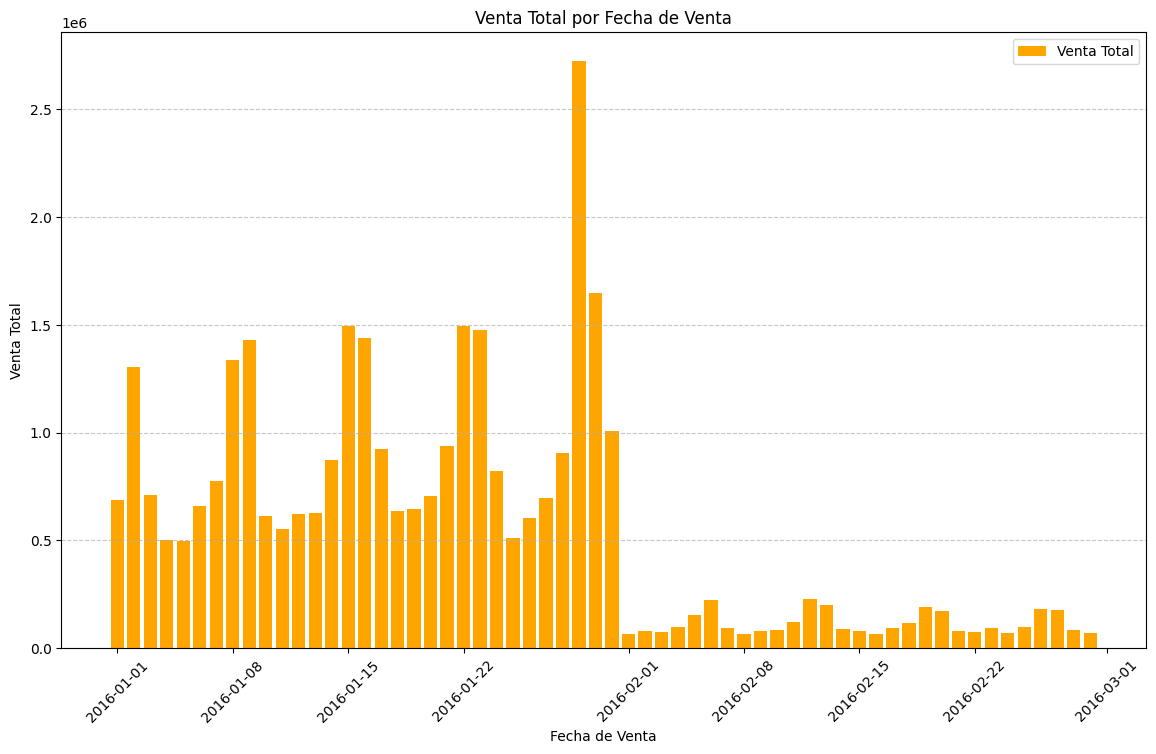

In [24]:
import matplotlib.pyplot as plt

# Agrupar los datos por fecha y sumar los valores de "Venta_Total"
ventas_agrupadas = VentasFinal.groupby('SalesDate').agg({'SalesDollars': 'sum'}).reset_index()

# Crear el gráfico de barras
plt.figure(figsize=(14, 8))

# Gráfico de barras para la venta total, cambiando el color
plt.bar(ventas_agrupadas['SalesDate'], ventas_agrupadas['SalesDollars'], color='orange', label='Venta Total')

# Añadir títulos y etiquetas
plt.title('Venta Total por Fecha de Venta')
plt.xlabel('Fecha de Venta')
plt.ylabel('Venta Total')
plt.legend()

# Rotar etiquetas del eje X para una mejor visualización
plt.xticks(rotation=45)
plt.grid(True, axis='y', linestyle='--', alpha=0.7)

# Mostrar gráfico
plt.show()


Los 10 Mejores Proveedores por Ventas Totales en Dinero


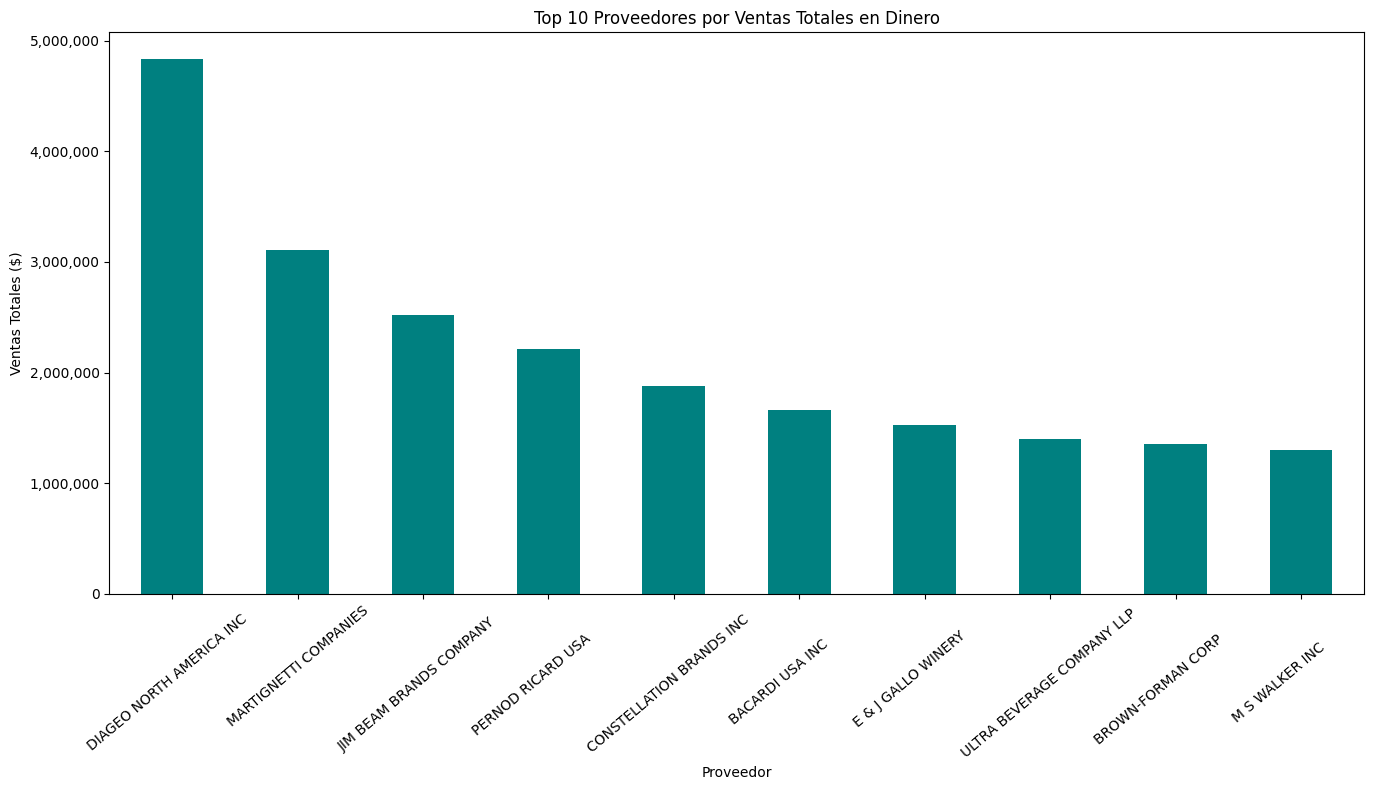

In [25]:
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

# Agrupar por proveedor y sumar las ventas en dólares
proveedor_ventas = VentasFinal.groupby('VendorName')['SalesDollars'].sum().sort_values(ascending=False)

# Seleccionar los 10 mejores proveedores
top_10_proveedores = proveedor_ventas.head(10)

# Crear el gráfico de barras
plt.figure(figsize=(14, 8))
top_10_proveedores.plot(kind='bar', color='teal')

# Configurar el formato del eje y para evitar la notación científica
plt.gca().yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, _: f'{x:,.0f}'))

plt.title('Top 10 Proveedores por Ventas Totales en Dinero')
plt.xlabel('Proveedor')
plt.ylabel('Ventas Totales ($)')
plt.xticks(rotation=40)
plt.tight_layout()
plt.show()


Los 10 Mejores Productos por Cantidad Vendida


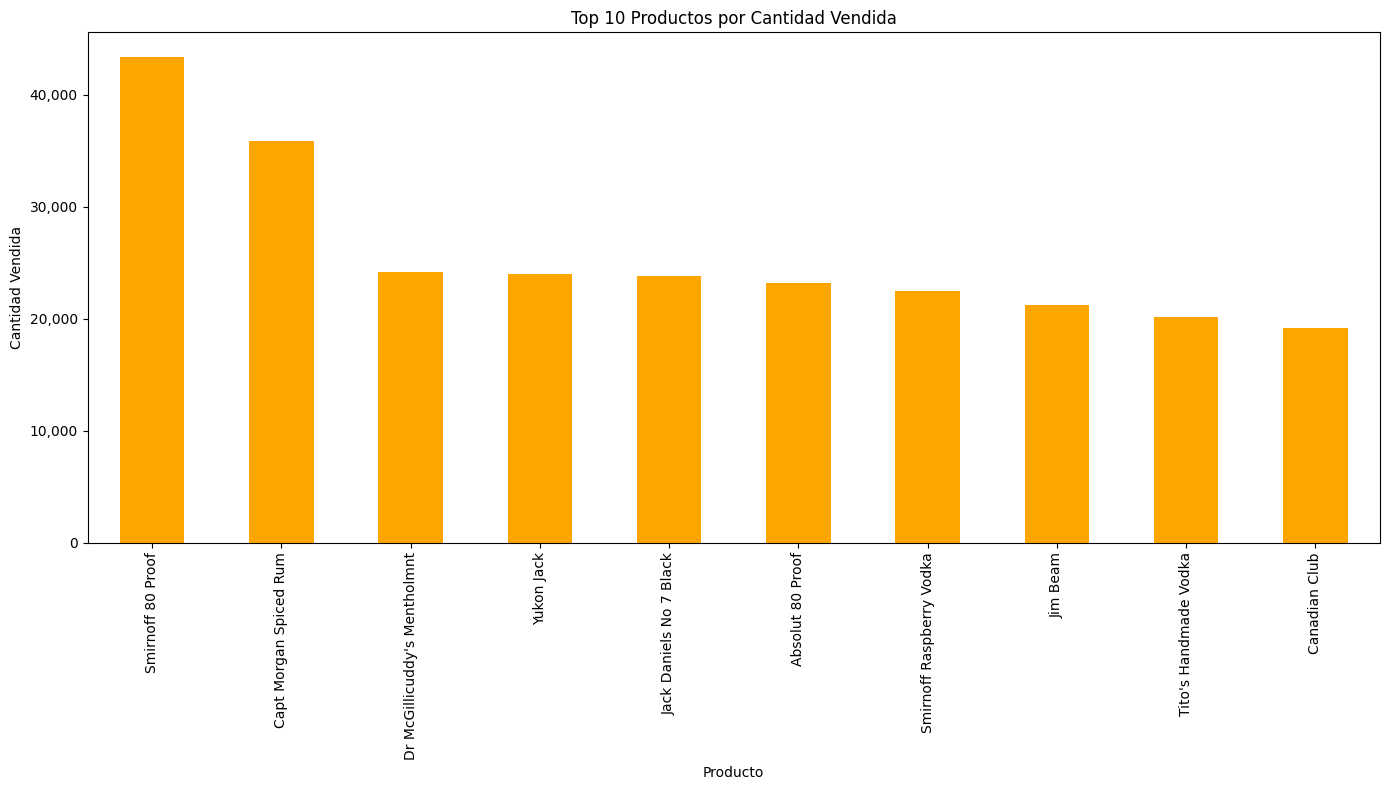

In [26]:
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

# Agrupar por descripción del producto y sumar las cantidades vendidas
producto_cantidad = VentasFinal.groupby('Description')['SalesQuantity'].sum().sort_values(ascending=False)

# Seleccionar los 10 mejores productos
top_10_productos = producto_cantidad.head(10)

# Crear el gráfico de barras
plt.figure(figsize=(14, 8))
top_10_productos.plot(kind='bar', color='orange')

# Configurar el formato del eje y para evitar la notación científica
plt.gca().yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, _: f'{x:,.0f}'))

plt.title('Top 10 Productos por Cantidad Vendida')
plt.xlabel('Producto')
plt.ylabel('Cantidad Vendida')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()


Top 5 mejores vendedores

<Figure size 1800x1000 with 0 Axes>

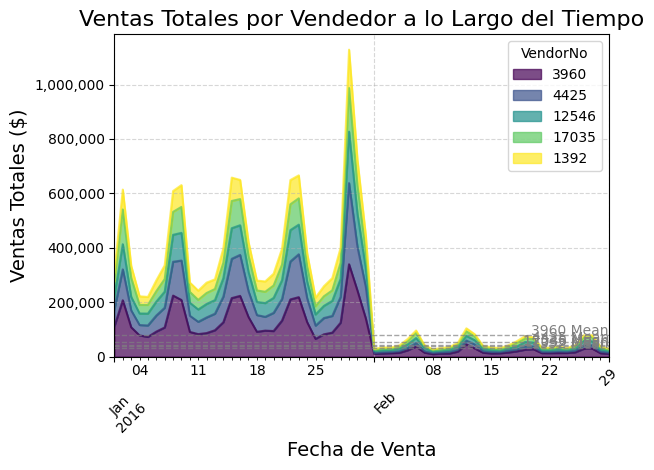

In [27]:
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.ticker as ticker

# Agrupar por vendedor y fecha, y sumar las ventas en dólares
ventas_vendedor_fecha = VentasFinal.groupby(['SalesDate', 'VendorNo'])['SalesDollars'].sum().unstack().fillna(0)

# Seleccionar los 5 vendedores con más ventas totales
top_5_vendedores = ventas_vendedor_fecha.sum().nlargest(5).index

# Filtrar para los 5 mejores vendedores
ventas_top_5 = ventas_vendedor_fecha[top_5_vendedores]

# Crear el gráfico de líneas apiladas
plt.figure(figsize=(18, 10))
ax = ventas_top_5.plot(kind='area', stacked=True, colormap='viridis', alpha=0.7)

# Añadir títulos y etiquetas
plt.title('Ventas Totales por Vendedor a lo Largo del Tiempo', fontsize=16)
plt.xlabel('Fecha de Venta', fontsize=14)
plt.ylabel('Ventas Totales ($)', fontsize=14)
plt.xticks(rotation=45)
plt.grid(True, linestyle='--', alpha=0.5)

# Añadir una línea de promedio para cada vendedor
for vendor in ventas_top_5.columns:
    plt.axhline(y=ventas_top_5[vendor].mean(), color='grey', linestyle='--', alpha=0.7, linewidth=1)
    plt.text(ventas_top_5.index[-1], ventas_top_5[vendor].mean(), f'{vendor} Mean', color='grey', ha='right')

# Configurar el formato del eje y para evitar notación científica
ax.yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, _: f'{x:,.0f}'))

plt.tight_layout()
plt.show()


In [28]:
# Encontrar la fecha más antigua y la más reciente
fecha_min = VentasFinal['SalesDate'].min()
fecha_max = VentasFinal['SalesDate'].max()

print(f'Fecha más antigua en el dataset: {fecha_min}')
print(f'Fecha más reciente en el dataset: {fecha_max}')


Fecha más antigua en el dataset: 2016-01-01 00:00:00
Fecha más reciente en el dataset: 2016-02-29 00:00:00


In [29]:
#Guardamos estos procesos en un nuevo CSV
VentasFinal.to_csv('VentasFinales.csv', index=False)

#Imprimimos mensaje de confirmacion
print("Archivo guardado exitosamente") 

Archivo guardado exitosamente


In [30]:
VentasFinal.dtypes

InventoryId                   object
Store                          int64
BrandID                        int64
Description                   object
Size                          object
SalesQuantity                  int64
SalesDollars                 float64
SalesPrice                   float64
SalesDate             datetime64[ns]
Volume                         int64
Classification                 int64
ExciseTax                    float64
VendorNo                       int64
VendorName                    object
InventoryInicialID             int64
VentasID                       int64
Cantidad                       int64
dtype: object